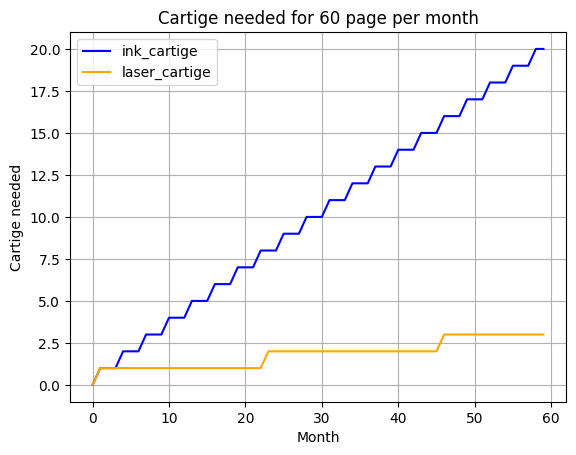

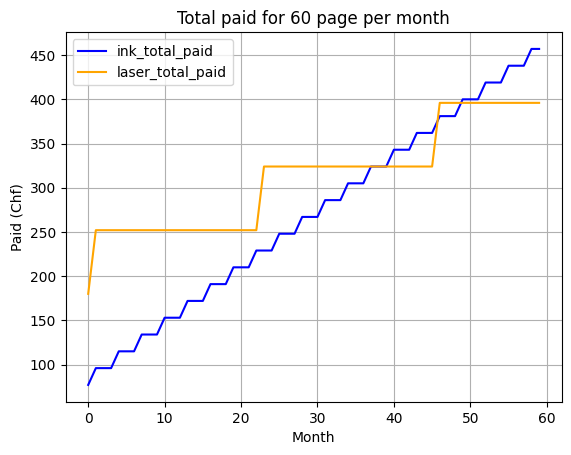

In [33]:

import numpy as np
import math
import matplotlib.pyplot as plt
import os
import glob

# Dossier où supprimer les fichiers PNG
dossier = "./"  # "." pour le dossier courant

# Trouver tous les fichiers .png
fichiers_png = glob.glob(os.path.join(dossier, "*.png"))

# Supprimer chaque fichier
for fichier in fichiers_png:
    os.remove(fichier)
    #print(f"Supprimé : {fichier}")

#ink    :   Canon PIXMA MG3650S
#laser  :   Canon i-Sensys LBP631Cw

page_per_month = 60
month_calculation = 12*5

ink_Printer_Price = 77.5
laser_Printer_Price = 180

ink_cartige_price = 19
ink_cartige_page_capacity = 180
ink_price_per_page = ink_cartige_price / ink_cartige_page_capacity

laser_cartige_price = 72 
laser_cartige_page_capacity = 1350
laser_price_per_page = laser_cartige_price / laser_cartige_page_capacity

#print("ink_price_per_page\t:\t", ink_price_per_page)
#print("laser_price_per_page\t:\t", laser_price_per_page)

months = np.arange(0, month_calculation, 1)

ink_cartige_needed = np.arange(0, month_calculation, 1)
laser_cartige_needed = np.arange(0, month_calculation, 1)

ink_total_paid = np.arange(0, month_calculation, 1)
laser_total_paid = np.arange(0, month_calculation, 1)

for month in months:
    total_page_printed = month * page_per_month

    ink_cartige_needed[month] = math.ceil(total_page_printed / ink_cartige_page_capacity)  
    laser_cartige_needed[month] = math.ceil(total_page_printed / laser_cartige_page_capacity)  

    ink_total_paid[month] = ink_Printer_Price + ink_cartige_needed[month] * ink_cartige_price
    laser_total_paid[month] = laser_Printer_Price + laser_cartige_needed[month] * laser_cartige_price


plt.figure()
plt.plot(months, ink_cartige_needed, label='ink_cartige', color='blue')  
plt.plot(months, laser_cartige_needed, label='laser_cartige', color='orange')  
plt.title("Cartige needed for %d page per month" % page_per_month)
plt.xlabel("Month")
plt.ylabel("Cartige needed")
plt.legend()  
plt.grid(True)  
plt.savefig("Cartige_needed.png")  
plt.show() 

plt.figure()
plt.plot(months, ink_total_paid, label='ink_total_paid', color='blue')  
plt.plot(months, laser_total_paid, label='laser_total_paid', color='orange')  
plt.title("Total paid for %d page per month" % page_per_month)
plt.xlabel("Month")
plt.ylabel("Paid (Chf)")
plt.legend()  
plt.grid(True)  
plt.savefig("Total_paid.png")  
plt.show() 
